# 허깅페이스 이미지

In [1]:
#Huggingface를 활용한 이미지 인식
# 방법1 : access token을 직접 입력하는 방법
# from huggingface_hub import notebook_login
# notebook_login()

# 방법2 : 환경변수에 저장, 로딩해서 인정하는 방법
from huggingface_hub import login
from dotenv import load_dotenv
import os
import tqdm as notebook_tqdm

# 1️⃣ .env 파일의 내용을 로드
load_dotenv(".env", override=True)

# 2️⃣ 환경 변수 가져오기
HF_READ_TOKEN = os.getenv("HF_READ_TOKEN")
# print(HF_READ_TOKEN)

# 로그인 실행
login(HF_READ_TOKEN)

c:\Users\Admin\miniconda3\envs\hf_env2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import pipeline

In [3]:
classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [4]:
img_path = "datas/사과.jpg"

In [5]:
result = classifier(img_path)

In [6]:
print(result[0]['label'])

Granny Smith


In [7]:
classifier("datas/야구.jpg")

[{'label': 'ballplayer, baseball player', 'score': 0.7657395601272583},
 {'label': 'baseball', 'score': 0.21402305364608765},
 {'label': 'scoreboard', 'score': 0.0026712703984230757},
 {'label': 'barometer', 'score': 0.0001704545720713213},
 {'label': 'torch', 'score': 0.00015355306095443666}]

## 객체 탐지

In [8]:
# object detection
detector = pipeline("object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\Admin\miniconda3\envs\hf_env2\Lib\site-packages\torch\nn\modules\module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hf_env2\Lib\site-packages\torch\nn\modules\module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them

In [9]:
import timm
print(timm.__version__)

1.0.21


In [10]:
# 객체 탐지
image_path = 'datas/도로.jpg'
results = detector(image_path)

In [11]:
results

[{'score': 0.8532266020774841,
  'label': 'traffic light',
  'box': {'xmin': 75, 'ymin': 395, 'xmax': 87, 'ymax': 415}},
 {'score': 0.9559845924377441,
  'label': 'traffic light',
  'box': {'xmin': 681, 'ymin': 390, 'xmax': 692, 'ymax': 412}},
 {'score': 0.978544294834137,
  'label': 'car',
  'box': {'xmin': 499, 'ymin': 417, 'xmax': 563, 'ymax': 458}},
 {'score': 0.99625164270401,
  'label': 'car',
  'box': {'xmin': 554, 'ymin': 428, 'xmax': 624, 'ymax': 461}},
 {'score': 0.9264611005783081,
  'label': 'car',
  'box': {'xmin': 620, 'ymin': 425, 'xmax': 655, 'ymax': 454}},
 {'score': 0.5060760378837585,
  'label': 'truck',
  'box': {'xmin': 171, 'ymin': 423, 'xmax': 227, 'ymax': 456}},
 {'score': 0.9724496006965637,
  'label': 'car',
  'box': {'xmin': 990, 'ymin': 424, 'xmax': 1040, 'ymax': 460}},
 {'score': 0.627194881439209,
  'label': 'car',
  'box': {'xmin': 966, 'ymin': 382, 'xmax': 1011, 'ymax': 399}},
 {'score': 0.9823445081710815,
  'label': 'car',
  'box': {'xmin': 814, 'ymin'

## 결과 시각화

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

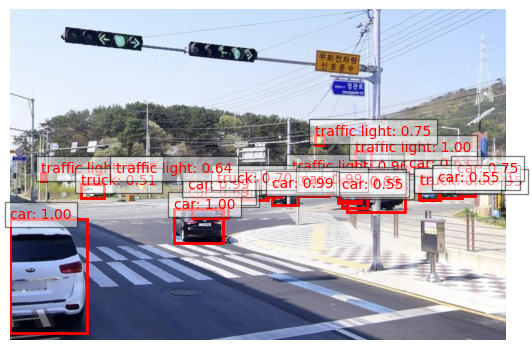

In [13]:
image = plt.imread(image_path)
fig, ax = plt.subplots(1)
ax.imshow(image)

for result in results:
    xmin = int(result['box']['xmin'])
    ymin = int(result['box']['ymin'])
    xmax = int(result['box']['xmax'])
    ymax = int(result['box']['ymax'])
    width = xmax - xmin
    height = ymax - ymin
    score = result['score']
    label = result['label']

    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(xmin, ymin, f'{label}: {score:.2f}', color='r', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.axis('off')
plt.show()


In [14]:
# pip install diffusers
# pip install huggingface_hub[all]

In [15]:
from diffusers import DiffusionPipeline
import torch

In [16]:
# 오류 발생함
# runwayml/stable-diffusion-v1-5
pipe = DiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5')

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
c:\Users\Admin\miniconda3\envs\hf_env2\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as a

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

LookupError: <ContextVar name='shell_parent' at 0x000001D3CCB150D0>